In [19]:
import json
import pandas as pd
import math
from datetime import datetime
from datetime import timezone
import pytz
from zoneinfo import ZoneInfo
import numpy as np
import matplotlib.pyplot as plt

In [23]:
data_list = []

# open the metrics file and read objects one by one
with open('800I_800P_100G_S70_RPI_500KBPS_1.json') as f:
    for line in f:
        print(line)
        data = json.loads(line)
        data_list.append(data)

# Create empty dataframes
exp_df = pd.DataFrame(columns=['bandwidth', 'location', 'timestamp'])
df_out = pd.DataFrame(columns=[ 'timestamp', 'bandwidth', 'location','selectivity','throughput','inputRate', 'trueProcessingRate'])

# Define the timezone objects
local_tz = pytz.timezone('EST') #Set to EST. Change if timezone changes.
utc_tz = pytz.timezone('UTC')
LocalZone = ZoneInfo("US/Eastern")

# Open the text file containing the bandwidth, location, and timestamp for the experiments
# with open('flink_exp_log.txt', 'r') as f:
#     # Read each line of the file
#     for line in f:
#       #If line is empty, skip
#       if not line.strip():
#         continue
#       # Split the line into three parts: bandwidth, location, and timestamp
#       bandwidth = line.split(',')[0].split(':')[1].strip()
#       location = line.split(',')[1].split(':')[1].strip()
#       timestamp = ':'.join(line.split(',')[2].split(':')[1:]).strip()
#       #Convert timestamp to iso format in utc
#       timestamp_txt = datetime.strptime(timestamp, "%Y-%m-%dT%H:%M:%S.%f").replace(tzinfo=LocalZone)
#       timestamp_txt_utc = timestamp_txt.astimezone(utc_tz)
#       # Append a new row to the dataframe
#       exp_df = exp_df.append({'bandwidth': bandwidth, 'location': location, 'timestamp': timestamp_txt_utc}, ignore_index=True)

#Loop over rows in metrics.json
for i in range(len(data_list)):
  #Ensure that the row is not empty.
  if len(data_list[i]) < 28:
    continue
  
  #Convert metric timestamp to utc object
  timestamp = (data_list[i][0]['timestamp'])
  timestamp_json = datetime.fromisoformat(timestamp.replace("Z", "+00:00"))
  #Initialize bandwidth, location, and, experiment timestamp to -1
  b = -1
  l = -1
  t = -1

  b = "500 kbps"
  l = "RPi"

  #Calculate selectivity
  selectivity = 0

  for j in range(10, 18):
      if np.isnan(float(data_list[i][j]['selectivityRatio'])):
          continue
      selectivity += float(data_list[i][j]['selectivityRatio'])
  
  avgSelectivity = selectivity/4

  #Calculate Throughput
  throughput = float(data_list[i][26]['numRecordsInPerSec']) + float(data_list[i][27]['numRecordsInPerSec'])

  #Calculate Input Rate
  inputRate = 0

  for k in range(1, 5):
    inputRate += float(data_list[i][k]['numRecordsOutPerSec'])

  #Calculate True Processing Rate
  trueProcessingRate = 0

  for j in range(10, 18):
      if np.isnan(float(data_list[i][j]['trueOutProcessingRate'])):
          continue
      trueProcessingRate += float(data_list[i][j]['trueOutProcessingRate'])
  
  avgtrueProcessingRate = trueProcessingRate/4
  
  #Write data into the dataframe
  df_out = df_out.append({'timestamp': timestamp_json, 'bandwidth': b, 'location': l,'selectivity': avgSelectivity,'throughput': throughput,'inputRate': inputRate, 'trueProcessingRate': avgtrueProcessingRate}, ignore_index=True)


df_out.to_json('final_csv/800I_800P_100G_S70_RPI_500KBPS_1.json')
df_out

[{"timestamp":"2023-04-26T19:33:53.951337Z"},{"numRecordsOutPerSec":"393.33334","trueOutProcessingRate":"NaN","vertexName":"Source: SourceBid","selectivityRatio":"Infinity","subtask":"0","numRecordsInPerSec":"0.0","backPressuredTimeMsPerSecond":"0","isBackPressured":"false"},{"numRecordsOutPerSec":"400.0","trueOutProcessingRate":"NaN","vertexName":"Source: SourceBid","selectivityRatio":"Infinity","subtask":"1","numRecordsInPerSec":"0.0","backPressuredTimeMsPerSecond":"0","isBackPressured":"false"},{"numRecordsOutPerSec":"400.0","trueOutProcessingRate":"NaN","vertexName":"Source: SourceBid","selectivityRatio":"Infinity","subtask":"2","numRecordsInPerSec":"0.0","backPressuredTimeMsPerSecond":"0","isBackPressured":"false"},{"numRecordsOutPerSec":"400.0","trueOutProcessingRate":"NaN","vertexName":"Source: SourceBid","selectivityRatio":"Infinity","subtask":"3","numRecordsInPerSec":"0.0","backPressuredTimeMsPerSecond":"0","isBackPressured":"false"},{"numRecordsOutPerSec":"0.0","trueOutProces

,timestamp,bandwidth,location,selectivity,throughput,inputRate,trueProcessingRate


In [278]:
df_out = pd.read_json('final_csv/metrics_s30_500mbit_server.json')
df_out1 = pd.read_json('final_csv/metrics_s30_500mbit_rpi.json')
df_out2 = pd.read_json('final_csv/metrics_s30_100mbit_server.json')
df_out3 = pd.read_json('final_csv/metrics_s30_100mbit_rpi.json')
df_out4 = pd.read_json('final_csv/metrics_s30_500kbit_server.json')
df_out5 = pd.read_json('final_csv/metrics_s30_500kbit_rpi.json')
df_out6 = pd.read_json('final_csv/metrics_s30_100kbit_server.json')
df_out7 = pd.read_json('final_csv/metrics_s30_100kbit_rpi.json')


df_out1['timestamp'] = pd.to_datetime(df_out1['timestamp'], utc=True)
df_out2['timestamp'] = pd.to_datetime(df_out2['timestamp'], utc=True)
df_out3['timestamp'] = pd.to_datetime(df_out3['timestamp'], utc=True)
df_out4['timestamp'] = pd.to_datetime(df_out4['timestamp'], utc=True)
df_out5['timestamp'] = pd.to_datetime(df_out5['timestamp'], utc=True)
df_out6['timestamp'] = pd.to_datetime(df_out6['timestamp'], utc=True)
df_out7['timestamp'] = pd.to_datetime(df_out7['timestamp'], utc=True)

time_diff1 = df_out1['timestamp'].max() - df_out2['timestamp'].min()
time_diff2 = df_out3['timestamp'].max() - df_out4['timestamp'].min()
time_diff3 = df_out5['timestamp'].max() - df_out6['timestamp'].min()


df_out2['timestamp'] = df_out2['timestamp'] + time_diff1
df_out3['timestamp'] = df_out3['timestamp'] + time_diff1
df_out4['timestamp'] = df_out4['timestamp']+ time_diff1 + time_diff2
df_out5['timestamp'] = df_out5['timestamp'] + time_diff1 + time_diff2
df_out6['timestamp'] = df_out6['timestamp'] + time_diff1 + time_diff2 + time_diff3
df_out7['timestamp'] = df_out7['timestamp'] + time_diff1 + time_diff2 + time_diff3


df_out.to_csv('final_csv/final/metrics_s30_500mbit_server.csv')
df_out1.to_csv('final_csv/final/metrics_s30_500mbit_rpi.csv')
df_out2.to_csv('final_csv/final/metrics_s30_100mbit_server.csv')
df_out3.to_csv('final_csv/final/metrics_s30_100mbit_rpi.csv')
df_out4.to_csv('final_csv/final/metrics_s30_500kbit_server.csv')
df_out5.to_csv('final_csv/final/metrics_s30_500kbit_rpi.csv')
df_out6.to_csv('final_csv/final/metrics_s30_100kbit_server.csv')
df_out7.to_csv('final_csv/final/metrics_s30_100kbit_rpi.csv')




In [279]:
df_out = pd.read_csv('final_csv/final/metrics_s30_500mbit_server.csv')
df_out1 = pd.read_csv('final_csv/final/metrics_s30_500mbit_rpi.csv')
df_out2 = pd.read_csv('final_csv/final/metrics_s30_100mbit_server.csv')
df_out3 = pd.read_csv('final_csv/final/metrics_s30_100mbit_rpi.csv')
df_out4 = pd.read_csv('final_csv/final/metrics_s30_500kbit_server.csv')
df_out5 = pd.read_csv('final_csv/final/metrics_s30_500kbit_rpi.csv')


last_row_df_out1 = df_out1.iloc[[-1]]
last_row_df_out1['bandwidth'] = "100 mbps"
last_row_df_out1['location'] = "Server"
df_out2 = pd.concat([last_row_df_out1, df_out2], ignore_index=True)

last_row_df_out3 = df_out3.iloc[[-1]]
last_row_df_out3['bandwidth'] = "500 kbps"
last_row_df_out3['location'] = "Server"
df_out4 = pd.concat([last_row_df_out3, df_out4], ignore_index=True)

last_row_df_out5 = df_out5.iloc[[-1]]
last_row_df_out5['bandwidth'] = "100 kbps"
last_row_df_out5['location'] = "Server"
df_out6 = pd.concat([last_row_df_out5, df_out6], ignore_index=True)

df_combined = pd.concat([df_out, df_out1,df_out2, df_out3, df_out4, df_out5, df_out6, df_out7], ignore_index=True)
df_combined

/var/folders/qm/k2zk6b4d5t9fh0mwvwmwldbw0000gn/T/ipykernel_37054/394939751.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_row_df_out1['bandwidth'] = "100 mbps"
/var/folders/qm/k2zk6b4d5t9fh0mwvwmwldbw0000gn/T/ipykernel_37054/394939751.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_row_df_out1['location'] = "Server"
/var/folders/qm/k2zk6b4d5t9fh0mwvwmwldbw0000gn/T/ipykernel_37054/394939751.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

,Unnamed: 0,timestamp,bandwidth,location,selectivity,throughput,inputRate,trueProcessingRate
0,0.0,2023-04-25 05:05:47.773,500 mbps,Server,0.298021,1516.85005,5090.75010,139353.2825
1,1.0,2023-04-25 05:06:02.776,500 mbps,Server,0.299400,1564.33335,5262.45000,139433.3300
2,2.0,2023-04-25 05:06:17.779,500 mbps,Server,0.299752,1908.85005,6365.86670,175128.1375
3,3.0,2023-04-25 05:06:32.787,500 mbps,Server,0.299960,1910.28336,6355.80000,205122.9050
4,4.0,2023-04-25 05:06:47.795,500 mbps,Server,0.300736,1907.31670,6340.30010,182171.4175
...,...,...,...,...,...,...,...,...
328,NaN,2023-04-25 06:26:19.842000+00:00,100 kbps,RPi,0.300128,390.51668,1282.98333,NaN
329,NaN,2023-04-25 06:26:34.852000+00:00,100 kbps,RPi,0.299817,396.13333,1277.18335,NaN
330,NaN,2023-04-25 06:26:49.865000+00:00,100 kbps,RPi,0.298225,395.90000,1216.61667,NaN
331,NaN,2023-04-25 06:27:04.877000+00:00,100 kbps,RPi,0.297333,390.01666,1246.80001,NaN


In [21]:
def plot_subplots(df, title, parameter, filename, y_axis_name):
    df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)
    time_axis = (df['timestamp'] - df['timestamp'].min()).dt.total_seconds()    
    df_temp = df.copy()  # Create a temporary copy of the DataFrame to avoid modifying the original one
    df_temp['time_int'] = time_axis.astype(int)/60  # Add a new column with integer values of time axis
    
    fig, ax = plt.subplots()
    for (bandwidth, location), group in df_temp.groupby(['bandwidth', 'location']):
        label = f"Bandwidth: {bandwidth}, Location: {'RPi' if location == 'RPi' else 'Server'}"
        group.plot(x='time_int', y=parameter, ax=ax, label=label,figsize=(15, 9))
    ax.set_xlabel('Time (in Minutes)')
    ax.set_ylabel(y_axis_name)
    ax.set_title(title)
    ax.grid(True)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), )
    
    plt.savefig(filename, bbox_inches='tight')  # Save the figure to a file
    plt.show()  # Display the figure

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


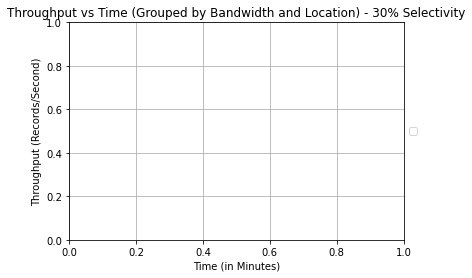

In [22]:
plot_subplots(df_out, 'Throughput vs Time (Grouped by Bandwidth and Location) - 30% Selectivity', 'throughput', 'throughputVsTime', 'Throughput (Records/Second)')

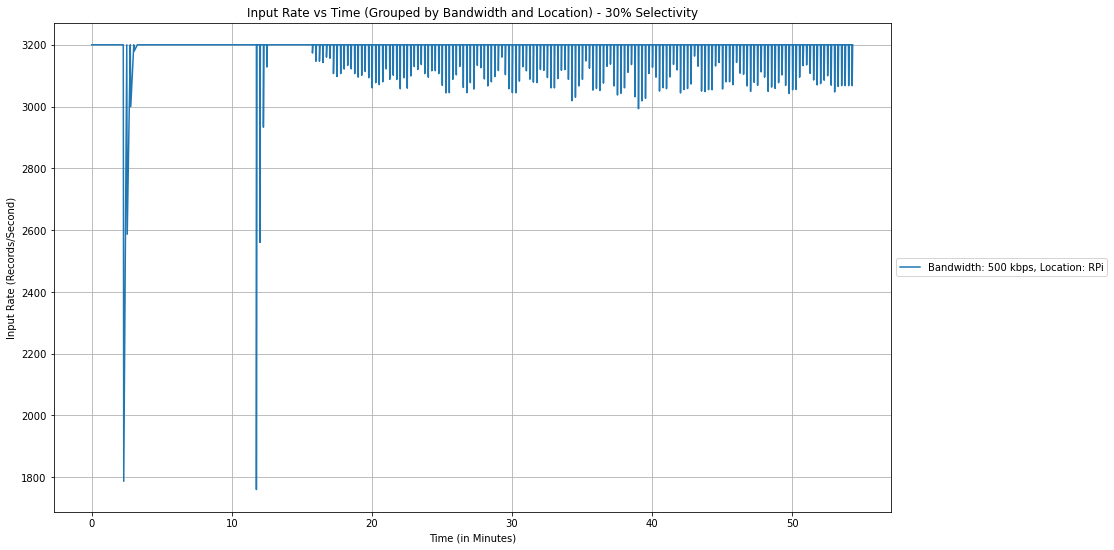

In [17]:
plot_subplots(df_out, 'Input Rate vs Time (Grouped by Bandwidth and Location) - 30% Selectivity', 'inputRate', 'inputRateVsTime', 'Input Rate (Records/Second)')

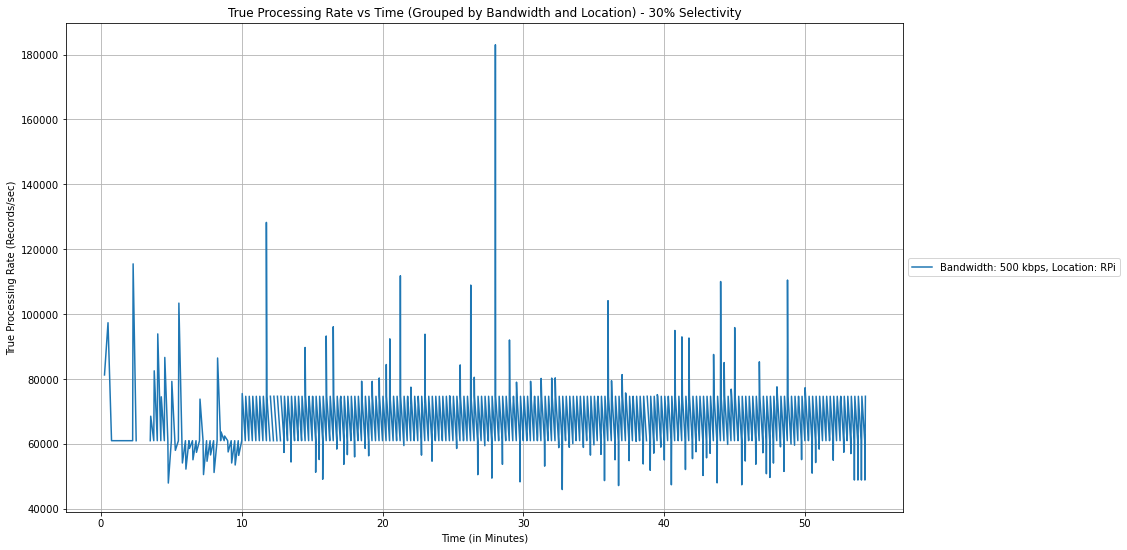

In [18]:
plot_subplots(df_out, 'True Processing Rate vs Time (Grouped by Bandwidth and Location) - 30% Selectivity', 'trueProcessingRate', 'tPRVsTime', 'True Processing Rate (Records/sec)')

In [199]:
df_out = pd.read_json('final_csv/metrics_500mbit_server_final.json')
df_out1 = pd.read_json('final_csv/metrics_500mbit_rpi_final.json')
df_out2 = pd.read_json('final_csv/metrics_100mbit_server_final.json')
df_out3 = pd.read_json('final_csv/metrics_100mbit_rpi_final.json')
df_out4 = pd.read_json('final_csv/metrics_500kbit_server_final.json')
df_out5 = pd.read_json('final_csv/metrics_500kbit_rpi_final.json')
df_out6 = pd.read_json('final_csv/metrics_100kbit_server_final.json')
df_out7 = pd.read_json('final_csv/metrics_100kbit_rpi_final.json')



df_out1['timestamp'] = pd.to_datetime(df_out1['timestamp'], utc=True)
df_out2['timestamp'] = pd.to_datetime(df_out2['timestamp'], utc=True)
df_out3['timestamp'] = pd.to_datetime(df_out3['timestamp'], utc=True)
df_out4['timestamp'] = pd.to_datetime(df_out4['timestamp'], utc=True)
df_out5['timestamp'] = pd.to_datetime(df_out5['timestamp'], utc=True)
df_out6['timestamp'] = pd.to_datetime(df_out6['timestamp'], utc=True)
df_out7['timestamp'] = pd.to_datetime(df_out7['timestamp'], utc=True)

# Calculate the time difference
time_diff1 = df_out1['timestamp'].max() - df_out2['timestamp'].min()
time_diff2 = df_out3['timestamp'].max() - df_out4['timestamp'].min()
time_diff3 = df_out5['timestamp'].max() - df_out6['timestamp'].min()


# Subtract the time difference from the timestamps in df_out1
df_out2['timestamp'] = df_out2['timestamp'] + time_diff1
df_out3['timestamp'] = df_out3['timestamp'] + time_diff1
df_out4['timestamp'] = df_out4['timestamp']+ time_diff1 + time_diff2
df_out5['timestamp'] = df_out5['timestamp'] + time_diff1 + time_diff2
df_out6['timestamp'] = df_out6['timestamp'] + time_diff1 + time_diff2 + time_diff3
df_out7['timestamp'] = df_out7['timestamp'] + time_diff1 + time_diff2 + time_diff3


df_out.to_csv('final_csv/final/metrics_500mbit_server_final.csv')
df_out1.to_csv('final_csv/final/metrics_500mbit_rpi_final.csv')
df_out2.to_csv('final_csv/final/metrics_100mbit_server_final.csv')
df_out3.to_csv('final_csv/final/metrics_100mbit_rpi_final.csv')
df_out4.to_csv('final_csv/final/metrics_500kbit_server_final.csv')
df_out5.to_csv('final_csv/final/metrics_500kbit_rpi_final.csv')
df_out6.to_csv('final_csv/final/metrics_100kbit_server_final.csv')
df_out7.to_csv('final_csv/final/metrics_100kbit_rpi_final.csv')




In [218]:
df_out = pd.read_csv('final_csv/final/metrics_500mbit_server_final.csv')
df_out1 = pd.read_csv('final_csv/final/metrics_500mbit_rpi_final.csv')
df_out2 = pd.read_csv('final_csv/final/metrics_100mbit_server_final.csv')
df_out3 = pd.read_csv('final_csv/final/metrics_100mbit_rpi_final.csv')
df_out4 = pd.read_csv('final_csv/final/metrics_500kbit_server_final.csv')
df_out5 = pd.read_csv('final_csv/final/metrics_500kbit_rpi_final.csv')
df_out6 = pd.read_csv('final_csv/final/metrics_100kbit_server_final.csv')
df_out7 = pd.read_csv('final_csv/final/metrics_100kbit_rpi_final.csv')

last_row_df_out1 = df_out1.iloc[[-1]]
last_row_df_out1['bandwidth'] = "100 mbps"
last_row_df_out1['location'] = "Server"
df_out2 = pd.concat([last_row_df_out1, df_out2], ignore_index=True)

last_row_df_out3 = df_out3.iloc[[-1]]
last_row_df_out3['bandwidth'] = "500 kbps"
last_row_df_out3['location'] = "Server"
df_out4 = pd.concat([last_row_df_out3, df_out4], ignore_index=True)

last_row_df_out5 = df_out5.iloc[[-1]]
last_row_df_out5['bandwidth'] = "100 kbps"
last_row_df_out5['location'] = "Server"
df_out6 = pd.concat([last_row_df_out5, df_out6], ignore_index=True)

df_combined = pd.concat([df_out, df_out1,df_out2, df_out3, df_out4, df_out5, df_out6, df_out7], ignore_index=True)
df_combined

/var/folders/qm/k2zk6b4d5t9fh0mwvwmwldbw0000gn/T/ipykernel_37054/3122310732.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_row_df_out1['bandwidth'] = "100 mbps"
/var/folders/qm/k2zk6b4d5t9fh0mwvwmwldbw0000gn/T/ipykernel_37054/3122310732.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_row_df_out1['location'] = "Server"
/var/folders/qm/k2zk6b4d5t9fh0mwvwmwldbw0000gn/T/ipykernel_37054/3122310732.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

,Unnamed: 0,timestamp,bandwidth,location,selectivity,throughput,inputRate,trueProcessingRate
0,0,2023-04-25 03:06:44.146,500 mbps,Server,0.699335,7207.26670,10979.04990,552840.8225
1,1,2023-04-25 03:06:59.149,500 mbps,Server,0.699190,3478.71670,4999.26670,337473.6050
2,2,2023-04-25 03:07:14.151,500 mbps,Server,0.699286,3459.81660,4969.06670,319187.0675
3,3,2023-04-25 03:07:29.157,500 mbps,Server,0.699315,3469.76660,4956.91660,217585.8375
4,4,2023-04-25 03:07:44.168,500 mbps,Server,0.700157,3469.53330,4956.93320,227092.3675
...,...,...,...,...,...,...,...,...
329,38,2023-04-25 04:27:16.132000+00:00,100 kbps,RPi,0.702270,399.80000,565.71666,NaN
330,39,2023-04-25 04:27:31.135000+00:00,100 kbps,RPi,0.699780,398.25000,553.38333,NaN
331,40,2023-04-25 04:27:46.141000+00:00,100 kbps,RPi,0.701610,400.10000,553.38334,77051.7830
332,41,2023-04-25 04:28:01.143000+00:00,100 kbps,RPi,0.701797,394.10000,584.08333,NaN


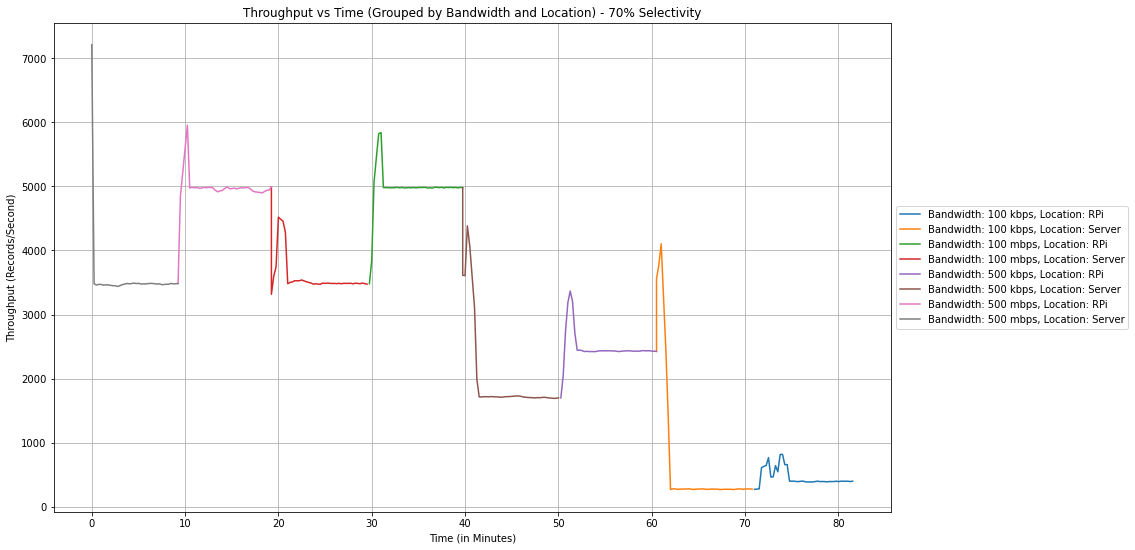

In [231]:
plot_subplots(df_combined, 'Throughput vs Time (Grouped by Bandwidth and Location) - 70% Selectivity', 'throughput', 'throughputVsTime', 'Throughput (Records/Second)')

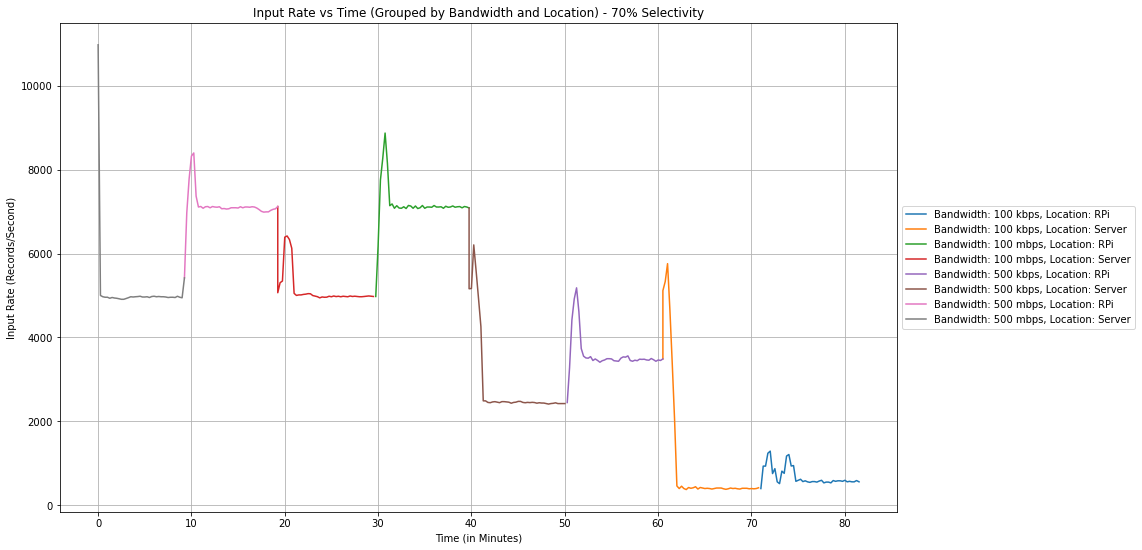

In [232]:
plot_subplots(df_combined, 'Input Rate vs Time (Grouped by Bandwidth and Location) - 70% Selectivity', 'inputRate', 'inputRateVsTime', 'Input Rate (Records/Second)')

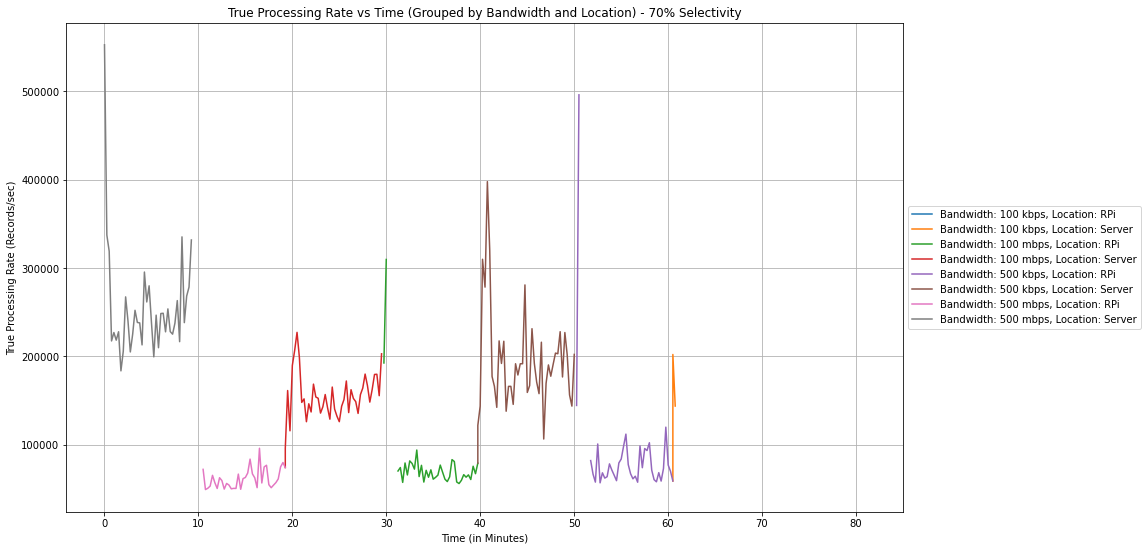

In [233]:
plot_subplots(df_combined, 'True Processing Rate vs Time (Grouped by Bandwidth and Location) - 70% Selectivity', 'trueProcessingRate', 'tPRVsTime', 'True Processing Rate (Records/sec)')